In [2]:
import matplotlib.pyplot as plt
import numpy as np
import uproot

In [22]:
f = uproot.open('pdhd_028850_LowECLMatching_test2.root')
tree = f["results"]
charge_x = tree["charge_x"].array()
charge_z = tree["charge_z"].array()
charge_y = tree["charge_y"].array()
dt = tree["dt"].array()
apa = tree["APA"].array()
charge_nplanes = tree["charge_nplanes"].array()
pds_amplitude = tree["pds_amplitude"].array()
charge_energy = tree["charge_energy"].array()
charge_peaktime = tree["charge_peaktime"].array()
pds_channel = tree["pds_ch"].array()

mask = (charge_nplanes == 2) & (pds_amplitude > 120) & (charge_energy > 15)

In [71]:
tree_charge_all = f['all_charge']
tree_charge_all['b']

KeyInFileError: not found: 'b'

    Available keys: 'Z', 'Y', 'T', 'APA', 'nplanes'

in file pdhd_028850_LowECLMatching_test_tightTwindow_singles_and_doubles.root
in object /all_charge;1

(array([1., 0., 0., 2., 0., 3., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 3., 4., 0., 1., 0., 3., 1., 1., 0., 0., 0., 4., 0.,
        1., 0., 1., 0., 1., 1., 1., 1., 1., 3., 1., 0., 2., 2., 0., 2.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.]),
 <BarContainer object of 50 artists>)

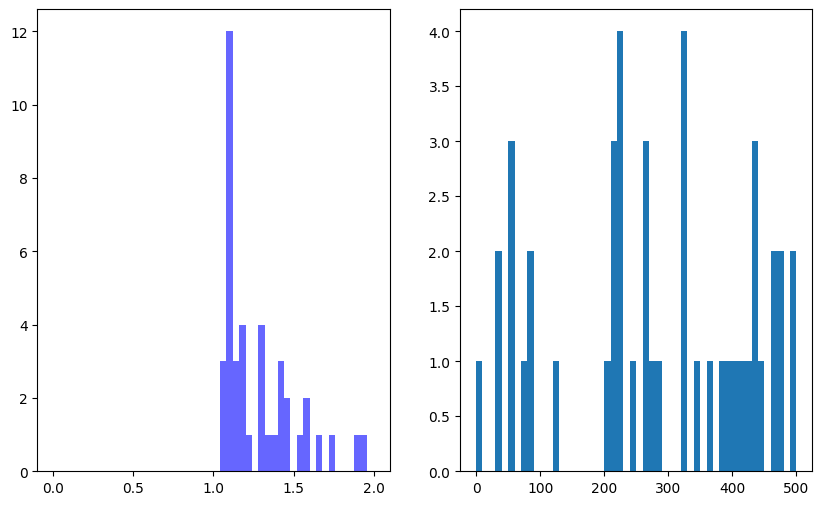

In [67]:
mask_bi = (charge_nplanes == 3) & (pds_amplitude > 120) & (charge_energy > 15) & (pds_channel == 89)
factor = 5E-3
R = 0.67
Wions = 23.6*10E-6
calib = Wions/(factor*R)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axes[0].hist(charge_energy[mask_bi]*calib, range=(0,2),bins=50, color='b', alpha=0.6)
axes[1].hist(dt[mask_bi], range=(0,500), bins=50)

In [23]:
Map = np.loadtxt('PDHD_PDS_ChannelMap.csv', skiprows=1, delimiter=',')

In [40]:
APAs = np.unique(Map[:,1])
z_window=200
y_window=15
cluster_z_all = []
cluster_y_all = []
for APA in APAs:
    y_vals = Map[:,4][Map[:,1] == APA]
    z_vals = Map[:,5][Map[:,1] == APA]

    unique_y_vals = np.unique(y_vals)
    unique_z_vals = list(np.unique(z_vals))*10
    for i in range(len(unique_y_vals)):
        #cluster_mask = (charge_z[mask] > z_vals[i] - z_window/2) & (charge_z[mask] < z_vals[i] + z_window/2) & \
        #                (charge_y[mask] > y_vals[i] - y_window/2) & (charge_y[mask] < y_vals[i] + y_window/2)
        cluster_mask = (charge_z[mask] > unique_z_vals[i] - z_window/2) & (charge_z[mask] < unique_z_vals[i] + z_window/2) & \
                        (charge_y[mask] > unique_y_vals[i] - y_window/2) & (charge_y[mask] < unique_y_vals[i] + y_window/2)
        if np.any(cluster_mask):
            cluster_z_all += list(charge_z[mask][cluster_mask] - unique_z_vals[i])
            cluster_y_all += list(charge_y[mask][cluster_mask] - unique_y_vals[i])

In [41]:
z_vals

array([347.29625, 347.29625, 347.29625, 347.29625, 347.29625, 347.29625,
       347.29625, 347.29625, 347.29625, 347.29625, 347.29625, 347.29625,
       347.29625, 347.29625, 347.29625, 347.29625, 347.29625, 347.29625,
       347.29625, 347.29625, 347.29625, 347.29625, 347.29625, 347.29625,
       347.29625, 347.29625, 347.29625, 347.29625, 347.29625, 347.29625,
       347.29625, 347.29625, 347.29625, 347.29625, 347.29625, 347.29625,
       347.29625, 347.29625, 347.29625, 347.29625])

In [42]:
len(cluster_z_all)

17762

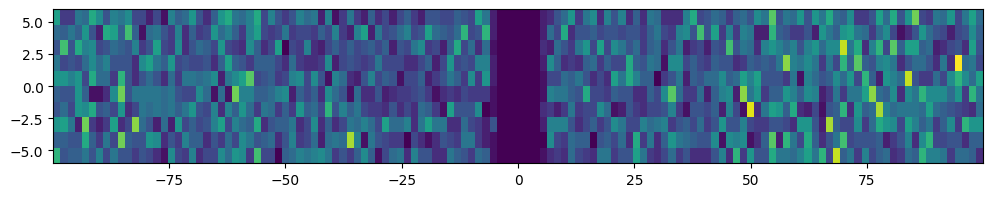

In [48]:
plt.figure(figsize=(12,2))
plt.hist2d(cluster_z_all, cluster_y_all, bins=[10*13, 10])
plt.show()